In [ ]:
#############
# problème de distance pour le quartier CARPIAGNE (retourne un nan)
# échelle de couleur à revoir pour la carte, probablement en regroupant les distances par intervalles
#############

In [2]:
import contextily as ctx
import folium
import geopandas as gpd
import numpy as np
import pandas as pd
import requests


In [3]:
output_path = '/home/marthe/Documents/DS/bacasable_doc/'

# Carte des quartiers de Marseille

In [4]:
# Importation des données géographiques des quartiers de Marseille
url = 'https://www.data.gouv.fr/api/1/datasets/r/8a8f7f54-7f91-482c-a78c-dd09d893d1b6'
file = requests.get(url)
data = file.content
quartiers_data = gpd.read_file(data)
quartiers_map = quartiers_data.rename({'NOM_QUA' : 'Quartier'}, axis = 1)

# Préparation du gdf d'adresses

In [5]:
# liens de téléchargement pour les 16 arrondissements
url_data = [
    'https://www.data.gouv.fr/api/1/datasets/r/84b5a6c5-5c0f-4518-8f6e-6e00b5fcacda',
    'https://www.data.gouv.fr/api/1/datasets/r/b5f2a20b-5951-4698-9b11-b86c51940eab',
    'https://www.data.gouv.fr/api/1/datasets/r/39aedda3-9479-40d5-97cf-405374813e09',
    'https://www.data.gouv.fr/api/1/datasets/r/c7126419-50d2-4eeb-9f9f-cca76e0ba4cf',
    'https://www.data.gouv.fr/api/1/datasets/r/15f80a80-34a2-47b7-80b8-fed1cde87f64',
    'https://www.data.gouv.fr/api/1/datasets/r/2b657228-e856-4b16-bd6e-d6fbeaf0b644',
    'https://www.data.gouv.fr/api/1/datasets/r/7659198f-da95-46d3-918a-f1c89db62131',
    'https://www.data.gouv.fr/api/1/datasets/r/04a47775-3b5a-4ed7-9d17-6dcc17adf47a',
    'https://www.data.gouv.fr/api/1/datasets/r/46c4de02-f529-4a42-8f24-cdc12e55e35c',
    'https://www.data.gouv.fr/api/1/datasets/r/699d4429-dd09-4978-adc8-78afab7aecc7',
    'https://www.data.gouv.fr/api/1/datasets/r/364bebd5-6762-493d-bb9a-a25d4e11edf1',
    'https://www.data.gouv.fr/api/1/datasets/r/ea5017ad-5e8b-4186-b560-07ea77960c94',
    'https://www.data.gouv.fr/api/1/datasets/r/c7024730-396d-4f0a-a238-e638fffade11',
    'https://www.data.gouv.fr/api/1/datasets/r/b0fefb17-69aa-45f2-b09e-0c29cb2cd689',
    'https://www.data.gouv.fr/api/1/datasets/r/da06caf0-2cc6-4282-82c6-e8da1a57d3ed',
    'https://www.data.gouv.fr/api/1/datasets/r/ee39eb43-74f7-490c-b728-2fea9d34dfeb'
    ]


In [6]:
# initialisation du df d'adresses avec le premier arrondissement
adresses = pd.read_csv(url_data[0], sep = ';')

# boucle de concaténation des autres attondissements
for url in url_data[1:]:
    data = pd.read_csv(url, sep = ";")
    adresses = pd.concat([adresses, data], axis = 0, ignore_index = True)

adresses

# À noter : variables x et y dans le système Lambert93 / variables long et lat dans le système WGS 

,uid_adresse,cle_interop,commune_insee,commune_nom,commune_deleguee_insee,commune_deleguee_nom,voie_nom,lieudit_complement_nom,numero,suffixe,position,x,y,long,lat,cad_parcelles,source,date_der_maj,certification_commune
0,90259,13201_2838_00002,13201,1er arrondissement,NaN,NaN,Rue docteur claudius regaud,belsunce,2,NaN,entrée,892909.23,6247635.35,5.376411,43.301756,131201801 A0355,commune,2022-11-24,1
1,75934,13201_0056_00020,13201,1er arrondissement,NaN,NaN,Rue de l' academie,noailles,20,NaN,entrée,893278.13,6246964.78,5.380704,43.295626,131201803 B0107,commune,2022-11-24,1
2,75936,13201_0056_00024,13201,1er arrondissement,NaN,NaN,Rue de l' academie,noailles,24,NaN,entrée,893289.00,6246979.84,5.380844,43.295759,131201803 B0110,commune,2022-11-24,1
3,89905,13201_0056_00001,13201,1er arrondissement,NaN,NaN,Rue de l' academie,noailles,1,NaN,entrée,893225.91,6246907.13,5.380040,43.295122,131201803 A0237,commune,2022-11-24,1
4,75937,13201_0056_00026,13201,1er arrondissement,NaN,NaN,Rue de l' academie,noailles,26,NaN,entrée,893294.50,6246987.48,5.380914,43.295826,131201803 B0111,commune,2022-11-24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91640,13831,13216_4691_00001,13216,16e arrondissement,NaN,NaN,Rue jean jacques vernazza,l'estaque,1,NaN,entrée,888369.33,6254229.65,5.322907,43.362266,131216908 E0205,commune,2022-11-24,1
91641,107641,13216_z436_00011,13216,16e arrondissement,NaN,NaN,Rue kader tighilt,l'estaque,11,NaN,entrée,888244.97,6254142.45,5.321343,43.361515,131216908 E0459,commune,2022-11-24,1
91642,84948,13216_0774_00059,13216,16e arrondissement,NaN,NaN,Traverse de la barre,saint andre,59,NaN,entrée,890202.73,6254707.15,5.345678,43.366072,131216910 A0067,commune,2022-11-24,1
91643,84949,13216_0774_00049,13216,16e arrondissement,NaN,NaN,Traverse de la barre,saint andre,49,NaN,entrée,890208.32,6254653.90,5.345727,43.365592,131216910 A0056,commune,2022-11-24,1


In [7]:
adresses = adresses.rename({'lieudit_complement_nom' : 'Quartier'}, axis = 1)

In [8]:
# Conversion en geodataframe
gdf_adresses = gpd.GeoDataFrame(
    adresses,
    geometry=gpd.points_from_xy(
        adresses['long'],
        adresses['lat'],
        crs="EPSG:4326"))


# Préparation du gdf de pav

In [9]:
# Importation des données concernant les points d'apport volontaire
url = 'https://www.data.gouv.fr/api/1/datasets/r/e46c6879-49e7-4727-8f3b-62df90ac5a5a'
gouv_data = pd.read_csv(url, sep = ';')

In [10]:
# Extraction des variables d'intérêt
pav_data = gouv_data[['OBJECTID', 'Code Commune INSEE', 'Quartier', 'Volume intérieur m3', 'longitude', 'latitude']]

# Extraction des observations concernant les quartiers de Marseille
pav = pav_data.loc[(pav_data['Code Commune INSEE'] > 13200) & (pav_data['Code Commune INSEE'] < 13217)]
pav = pav.dropna(axis = 0, subset = ['Quartier'])


# conversion en geodataframe
gdf_pav = gpd.GeoDataFrame(
    pav,
    geometry=gpd.points_from_xy(
        pav['longitude'],
        pav['latitude'],
        crs="EPSG:4326"))


# Uniformisation des noms de quartier

In [11]:
gdf_adresses['Quartier'] = gdf_adresses['Quartier'].apply(lambda x : x.upper())

In [12]:
# Correction des noms de quartiers 

gdf_pav['Quartier'] = gdf_pav['Quartier'].replace(
    {
    'LE ROUCAS' : 'LE ROUCAS BLANC',
    'ST BARNANE' : 'SAINT BARNABE',
    'ROUCAS BLANC' : 'LE ROUCAS BLANC'
    }
)

quartiers_map['Quartier'] = quartiers_map['Quartier'].replace(
    {
        'SAINT MAURON' : 'SAINT MAURONT',
        'VIELLE CHAPELLE' : 'VIEILLE CHAPELLE',
        'GRANDS CARMES' : 'LES GRANDS CARMES',
        'LA VILETTE' : 'LA VILLETTE',
        'CHUTES LAVIE' : 'LES CHUTES LAVIES',
        'CINQ AVENUES' : 'LES CINQ AVENUES',
        'ROUCAS BLANC' : 'LE ROUCAS BLANC',
        'POINTE ROUGE' : 'LA POINTE ROUGE',
        'SAINTE MARGUERITE' : 'STE MARGUERITE',
        'CHATEAU-GOMBERT' : 'CHATEAU GOMBERT'
        

    }
)



# Recherche des pav les plus proches de chaque adresse

In [13]:
gdf_adresses = gdf_adresses.to_crs(2154)
gdf_pav = gdf_pav.to_crs(2154)

In [14]:
# calcul de la distance du pav le plus proche d'une adresse donnée
def distances_pav(adresse):
    distance = 1000
    for pav in gdf_pav['geometry']:
        if adresse.distance(pav) < distance:
            distance = adresse.distance(pav)
    return round(distance)



# Chargement du fichier traité / ou traitement du fichier 
try :
    quartiers_dist = gpd.read_file('../data/distances_moyenne_adresses_pav.shp')
    
except :  
    print('Mean distances file not found, generating new file')
    gdf_adresses['dist_pav'] = gdf_adresses['geometry'].apply(lambda x : distances_pav(x))
    # groupby par quartier avec distance moyenne
    gdf_distance_moyenne = gdf_adresses[['Quartier', 'geometry', 'dist_pav']].dissolve(by = 'Quartier', aggfunc = 'mean')
    # jointure avec les données de
    quartiers_dist = quartiers_map.merge(gdf_distance_moyenne.drop(['geometry'], axis = 1), on = 'Quartier', how = 'left')
    # save
    quartiers_dist.to_file('../data/distances_moyenne_adresses_pav.shp', index = False)





In [16]:
# ATTENTION : une valeur manquante dans les distance à corriger...
# arrondi des distances à l'entier
quartiers_dist['dist_pav'] = quartiers_dist['dist_pav'].apply(lambda x : round(x) if pd.notnull(x) else np.nan)

# Génération de la carte

In [17]:
quartiers_dist = quartiers_dist.to_crs(3857)
gdf_pav = gdf_pav.to_crs(3857)

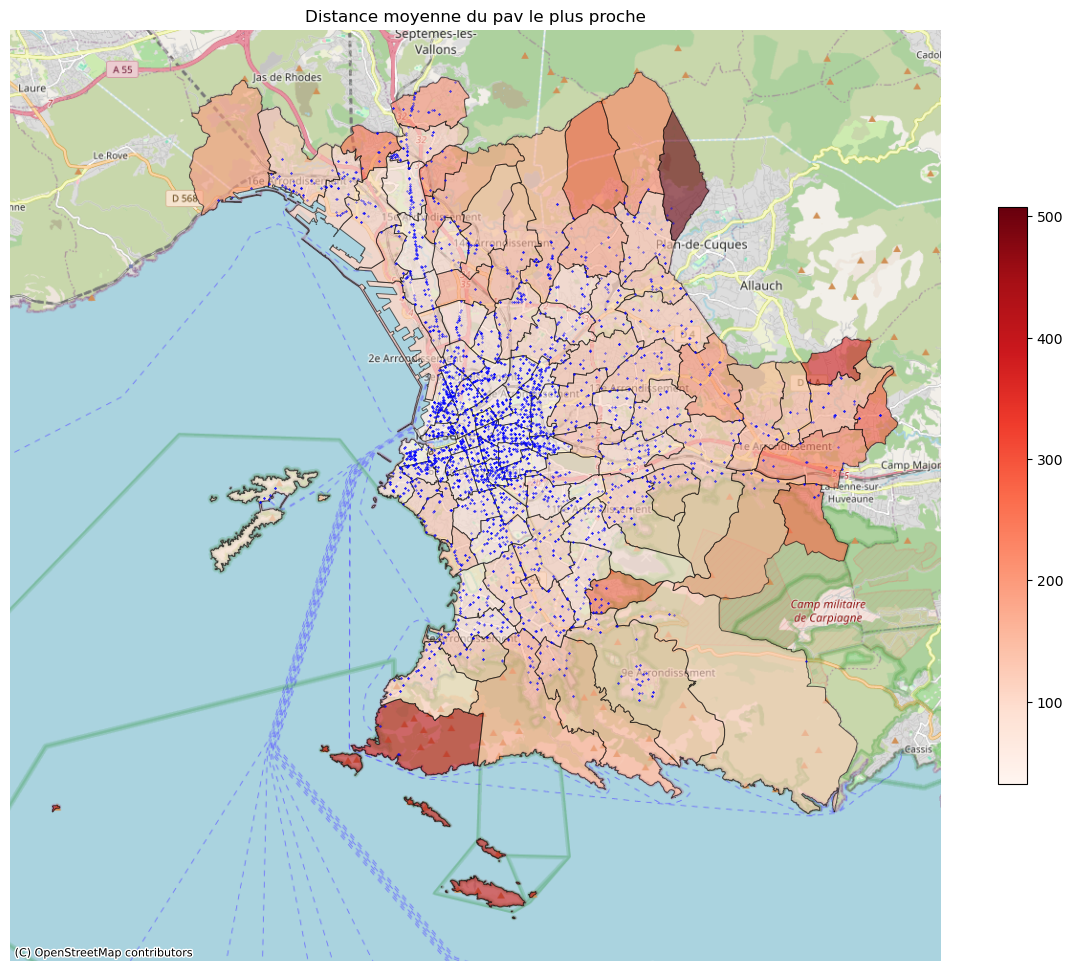

In [25]:
base = quartiers_dist.plot(
    edgecolor = 'black',
    linewidth = 0.7,
    figsize = (15,15),
    column = 'dist_pav',
    cmap = 'Reds',
    alpha = 0.6,
    legend = True,
    legend_kwds={'shrink': 0.5}
    )


gdf_pav.plot(
    ax = base,
    color = 'Blue',
    markersize = 0.1

)

ctx.add_basemap(ax = base, source = ctx.providers.OpenStreetMap.Mapnik)

base.set_axis_off()

base.set_title("Distance moyenne du pav le plus proche");


In [26]:
map = folium.Map(
    location = [43.3, 5.4],
    tiles = 'cartodbpositron',
    zoom_start = 12,
    max_zoom=17,
    control_scale=True
    )


gdf_pav.explore(
    m = map,
    marker_kwds=dict(radius=0.5, fill=True),
    color = 'Gray'
)


quartiers_dist.explore(
    m = map,
    # highlight = True,
    column = 'dist_pav',
    cmap = 'Reds',
    tooltip = ['Quartier', 'dist_pav'],
    marker_kwds=dict(radius=0.5, fill=True),
    color = 'Black'
    )



map_title = "distance moyenne du pav le plus proche"
title_html = f'<h1 style="position:absolute;z-index:100000;left:40vw" >{map_title}</h1>'
map.get_root().html.add_child(folium.Element(title_html))



map.save(output_path + 'map_distance_moyenne.html')


